In [26]:
# I took help to make this project from kaggle 
# https://www.kaggle.com/code/ramjasmaurya/apple-stock-price-prediction-using-lstm


In [2]:
# importing neccessary libraries here
import pandas as pd
import numpy as np
from numpy import array
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [3]:
    data=pd.read_csv("F:/MyUCP/DataScience/Training/Apple_stock_price_Prediction/apple_share_price.csv")
    data.head(10)

,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321
5,4-Aug-17,156.07,157.40,155.69,156.39,20559852
6,3-Aug-17,157.05,157.21,155.02,155.57,27097296
7,2-Aug-17,159.28,159.75,156.16,157.14,69936800
8,1-Aug-17,149.10,150.22,148.41,150.05,35368645
9,31-Jul-17,149.90,150.33,148.13,148.73,19845920


In [4]:
data.shape

(1664, 6)

In [5]:
data_1=data.reset_index()['Close']
data_1.head(10)


0    157.48
1    155.32
2    161.06
3    160.08
4    158.81
5    156.39
6    155.57
7    157.14
8    150.05
9    148.73
Name: Close, dtype: float64

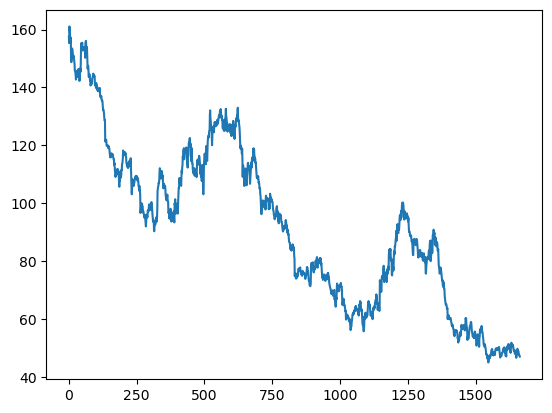

In [6]:
plt.plot(data_1)
plt.show()

In [7]:
#Scales the input data (data_1) to a range of [0, 1],
#which is important for maintaining uniformity and improving the performance of the LSTM model.
# -1 means "unknown number of rows" and 1 indicates one column.

scaler=MinMaxScaler(feature_range=(0,1))
data_1=scaler.fit_transform(np.array(data_1).reshape(-1,1))
data_1

array([[0.96914059],
       [0.95052151],
       [1.        ],
       ...,
       [0.02292906],
       [0.01965348],
       [0.01749849]])

In [8]:
#65% of the data is used for training the model.
#The remaining 35% is used for testing.

training_size=int(len(data_1)*0.65)
test_size=len(data_1)-training_size
train_data,test_data=data_1[0:training_size,:],data_1[training_size:len(data_1),:1]
print(training_size,test_size)

1081 583


In [9]:
# Now i need to Defines the:
# 1. number of previous time steps to consider for predicting the next point.
# 2. equences of time_step length.
# 3. corresponding target values (the next value in the sequence).
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
# Now lets say i want this model to look at 100 data points to predict the next values
# i will input feature and target values for both training and testing
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
print(X_train.shape), print(y_train.shape),print(X_test.shape), print(ytest.shape)

(980, 100)
(980,)
(482, 100)
(482,)


(None, None, None, None)

In [12]:
# i need to reshape the data into a 3D format
# Because it is required for LSTM models
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
# Now i will maake a linear stack of layers.
# Each layer will contain 50 neurons
# I will use a single neuron to predict the values
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
# I will train the model to to minimize the Mean Squared Error
model.compile(loss='mse',optimizer='adam')
model.summary()

C:\Users\IBM\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=0)

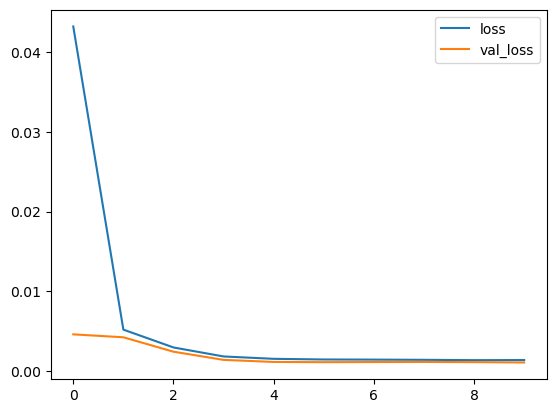

In [15]:
#  training history into a DataFrame for visualization
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [16]:
# prediction on both the training and test datasets.
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [17]:
#Converting the scaled predictions back to their original scale.

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [18]:
# RMSE to Measure the difference between predicted and actual values
# to find an indication of the model’s accuracy.
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

102.38751583956567
69.40488574869165


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


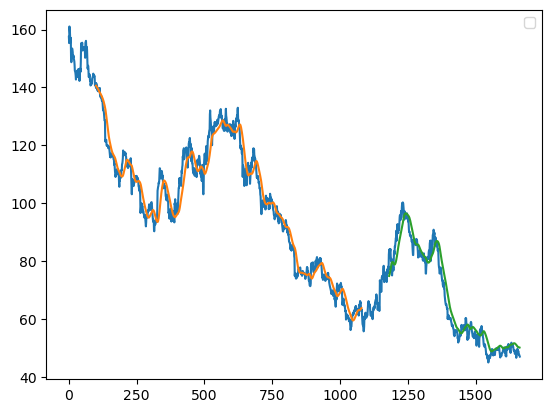

In [19]:
# Now main job is done 
#visualize the model's predictions against the actual data
look_back=100
trainPredictPlot = np.empty_like(data_1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

In [20]:
# taking the last portion of the test data as input for forecasting future values.
x_input=test_data[483:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [21]:
#This loop generates future values for the next 30 time steps based on the model’s predictions.
#The loop uses the last 100 values to predict the next value,
#then appends this to the list and repeats.
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
lst_output

[0.04341546]
101
1 day input [0.02077407 0.02344625 0.02448065 0.03103181 0.03016981 0.02560124
 0.02206706 0.03094561 0.03844496 0.03922076 0.04197914 0.03973795
 0.03853116 0.03870356 0.04215154 0.04042755 0.03810016 0.04284113
 0.03870356 0.04284113 0.04318593 0.04637531 0.04353073 0.03335919
 0.02775623 0.02034307 0.01491251 0.02103267 0.02560124 0.02103267
 0.01905008 0.02430825 0.02801483 0.02792863 0.02896302 0.0318076
 0.03594518 0.04085855 0.04094475 0.04387553 0.04318593 0.04456512
 0.03646237 0.02939402 0.0318076  0.02948022 0.01887768 0.02379105
 0.01801569 0.03706577 0.04706491 0.04508232 0.03853116 0.04568572
 0.04973709 0.04930609 0.05499526 0.05447806 0.04525472 0.04180674
 0.04663391 0.04042755 0.03387639 0.03361779 0.02861822 0.04335833
 0.05292647 0.05887423 0.05482286 0.05396087 0.05111628 0.0482717
 0.05275407 0.0490475  0.04499612 0.03835876 0.03456599 0.03568658
 0.03654857 0.02948022 0.02551504 0.03430739 0.03508318 0.0320662
 0.02723903 0.01396431 0.02137747 0.

8 day output [[0.04529265]]
9 day input [0.03844496 0.03922076 0.04197914 0.03973795 0.03853116 0.03870356
 0.04215154 0.04042755 0.03810016 0.04284113 0.03870356 0.04284113
 0.04318593 0.04637531 0.04353073 0.03335919 0.02775623 0.02034307
 0.01491251 0.02103267 0.02560124 0.02103267 0.01905008 0.02430825
 0.02801483 0.02792863 0.02896302 0.0318076  0.03594518 0.04085855
 0.04094475 0.04387553 0.04318593 0.04456512 0.03646237 0.02939402
 0.0318076  0.02948022 0.01887768 0.02379105 0.01801569 0.03706577
 0.04706491 0.04508232 0.03853116 0.04568572 0.04973709 0.04930609
 0.05499526 0.05447806 0.04525472 0.04180674 0.04663391 0.04042755
 0.03387639 0.03361779 0.02861822 0.04335833 0.05292647 0.05887423
 0.05482286 0.05396087 0.05111628 0.0482717  0.05275407 0.0490475
 0.04499612 0.03835876 0.03456599 0.03568658 0.03654857 0.02948022
 0.02551504 0.03430739 0.03508318 0.0320662  0.02723903 0.01396431
 0.02137747 0.02896302 0.03111801 0.04077235 0.03732437 0.03577278
 0.032411   0.03335919 

16 day output [[0.05239876]]
17 day input [0.03810016 0.04284113 0.03870356 0.04284113 0.04318593 0.04637531
 0.04353073 0.03335919 0.02775623 0.02034307 0.01491251 0.02103267
 0.02560124 0.02103267 0.01905008 0.02430825 0.02801483 0.02792863
 0.02896302 0.0318076  0.03594518 0.04085855 0.04094475 0.04387553
 0.04318593 0.04456512 0.03646237 0.02939402 0.0318076  0.02948022
 0.01887768 0.02379105 0.01801569 0.03706577 0.04706491 0.04508232
 0.03853116 0.04568572 0.04973709 0.04930609 0.05499526 0.05447806
 0.04525472 0.04180674 0.04663391 0.04042755 0.03387639 0.03361779
 0.02861822 0.04335833 0.05292647 0.05887423 0.05482286 0.05396087
 0.05111628 0.0482717  0.05275407 0.0490475  0.04499612 0.03835876
 0.03456599 0.03568658 0.03654857 0.02948022 0.02551504 0.03430739
 0.03508318 0.0320662  0.02723903 0.01396431 0.02137747 0.02896302
 0.03111801 0.04077235 0.03732437 0.03577278 0.032411   0.03335919
 0.02560124 0.02267046 0.02292906 0.01965348 0.01749849 0.04341546
 0.04296279 0.042716

25 day output [[0.06013358]]
26 day input [0.02034307 0.01491251 0.02103267 0.02560124 0.02103267 0.01905008
 0.02430825 0.02801483 0.02792863 0.02896302 0.0318076  0.03594518
 0.04085855 0.04094475 0.04387553 0.04318593 0.04456512 0.03646237
 0.02939402 0.0318076  0.02948022 0.01887768 0.02379105 0.01801569
 0.03706577 0.04706491 0.04508232 0.03853116 0.04568572 0.04973709
 0.04930609 0.05499526 0.05447806 0.04525472 0.04180674 0.04663391
 0.04042755 0.03387639 0.03361779 0.02861822 0.04335833 0.05292647
 0.05887423 0.05482286 0.05396087 0.05111628 0.0482717  0.05275407
 0.0490475  0.04499612 0.03835876 0.03456599 0.03568658 0.03654857
 0.02948022 0.02551504 0.03430739 0.03508318 0.0320662  0.02723903
 0.01396431 0.02137747 0.02896302 0.03111801 0.04077235 0.03732437
 0.03577278 0.032411   0.03335919 0.02560124 0.02267046 0.02292906
 0.01965348 0.01749849 0.04341546 0.04296279 0.0427162  0.04270289
 0.04291083 0.04330944 0.04386225 0.04453372 0.04529265 0.04611336
 0.04697562 0.047864

[[0.043415460735559464],
 [0.04296279326081276],
 [0.04271619766950607],
 [0.042702894657850266],
 [0.042910825461149216],
 [0.04330943524837494],
 [0.043862245976924896],
 [0.04453371837735176],
 [0.045292649418115616],
 [0.04611336067318916],
 [0.046975620090961456],
 [0.047864045947790146],
 [0.048767343163490295],
 [0.049677345901727676],
 [0.050588302314281464],
 [0.05149630829691887],
 [0.05239875614643097],
 [0.05329392850399017],
 [0.0541808120906353],
 [0.05505878105759621],
 [0.05592755600810051],
 [0.05678702890872955],
 [0.057637229561805725],
 [0.05847829580307007],
 [0.059310346841812134],
 [0.06013357639312744],
 [0.060948196798563004],
 [0.06175440549850464],
 [0.06255235522985458],
 [0.06334225088357925]]

In [22]:
# Now we can visualize actual recent data and the forecasted future values.
#This gives a visual indication of how well the model is expected to perform in predicting unseen data.
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

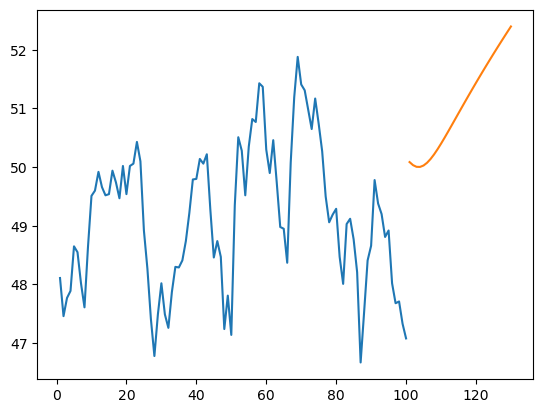

In [23]:
plt.plot(day_new,scaler.inverse_transform(data_1[1564:])) 
plt.plot(day_pred,scaler.inverse_transform(lst_output))

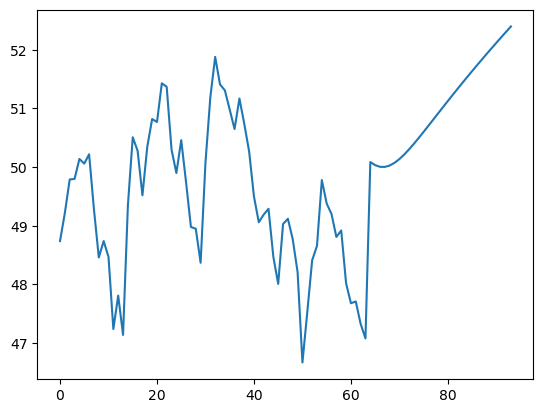

In [24]:
df3=data_1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3[1600:])

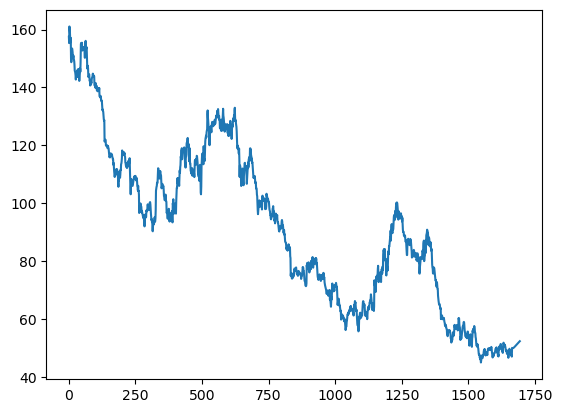

In [25]:
plt.plot(df3)